## Final Project Submission

Please fill out:
* Student name: MONICAH IWAGIT OKODOI
* Student pace: full time
* Scheduled project review date/time: 30/9/2022
* Instructor name: ANTONNY MUIKO 
* Blog post URL: 


# KING COUNTY REAL ESTATE HOUSING ANALYSIS

# Overview
King County is located in the U.S. state of Washington. It is the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, also the state's most populous city.

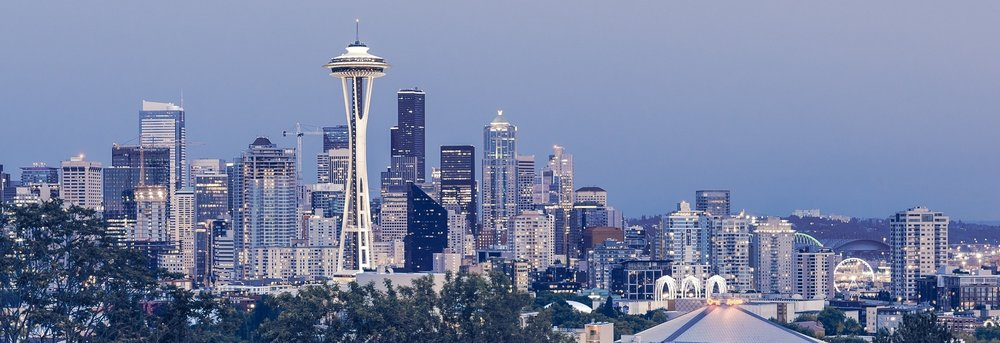

# 1. Business Understanding

A real estate agent of a company in Seattle wants to know which factors significantly impact the prices of a house in King County. This will aid in strategizing on the best criteria to take in order to maximize on profit.
I have been given the task by the company to come up with a model that will be used to predict property prices in King County and obtain significant recommendations on steps that they should take for the business to be successful.

# Business objectives:
    i) To understand factors that are most predictive of price.
    ii) which house features will give the best deals.
    iii) Obtain a model that will be of use when predicting the price of a property.


This project will utilize regression to build a model predicting housing prices in King County, Seattle. The King County data was provided which contains information on houses sold between May 2014 and May 2015.

# 2. Data Understanding

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
#loading the data
df = pd.read_csv("C:/Users/PC/Documents/Flatiron/project2/dsc-phase-2-project-v2-3/data/kc_house_data.csv", index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# checking on dataframe columns
df.columns.tolist()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [4]:
#number rows and columns in the data
df.shape

(21597, 20)

The dataset contains 21597 items and 20 features of house sales information in King County

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
#checking for null values in the dataframe
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

we can see that we have NULL/NaN values in waterfront,view and yr_renovation.

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#number of houses with unique floor values
df['floors'].value_counts().to_frame()


,floors
1.0,10673
2.0,8235
1.5,1910
3.0,611
2.5,161
3.5,7


In [9]:
# total number of houses without basement

(df.sqft_basement == '0.0').sum()

12826

In [10]:
# Total number of houses on a waterfront 

(df.waterfront == 'YES').sum()

146

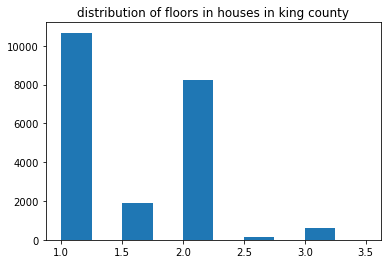

In [11]:
#distribution of number of floors in a house in the data

plt.hist(x = df['floors'])
plt.title("distribution of floors in houses in king county")
plt.show()

Most houses in King County have 1 floor.

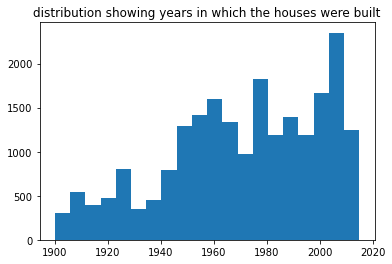

In [12]:
#distribution and trend in years in which king county houses were built according to the data

plt.hist(x = df['yr_built'], bins = 20)
plt.title("distribution showing years in which the houses were built")
plt.show()

#     Data description report

* King County data contains 21597 records with 20 features.
* We see that the data contains some null values in waterfront, view and year renovated.
* categorical data include waterfront, condition, grade and view.
* This data set is on house sales prices for King County, covering homes sold between May 2014 to May 2015
* Most houses have 1 floor
* The average home price is about 540,000 dollars with the highest being sold for nearly 800,000 dollars.
* The data contains houses built between 1900 and 2015.
* The average grade of the houses is 7, meaning most houses sold are above average grade.
* The maximum number of floors of houses you can find in King County is 3.5.


# 3. DATA PREPARATION

# For this analysis we have:
Sale price (price) as our prediction target 


In [13]:
#finding out the correlation between the features and our target variable price

corr = df.corr()
corr.shape

(14, 14)

In [14]:
df.corr()['price'].drop('price')

bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [15]:
#dropping columns that won't be needed in this analysis

df.drop(['zipcode','date', 'view', 'yr_renovated', 'sqft_basement', 'yr_built', 'lat', 'long'], axis=1, inplace=True)

In [16]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [17]:
#determine if the feature sqft_above is negatively or positively correlated with price.
def plot(x,y):
    sns.regplot(x, y, data=df)
    plt.ylim(0,)
    plt.show()

C:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


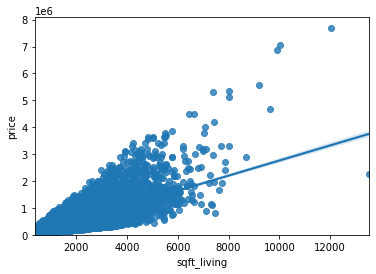

In [18]:
plot(x="sqft_living", y="price")

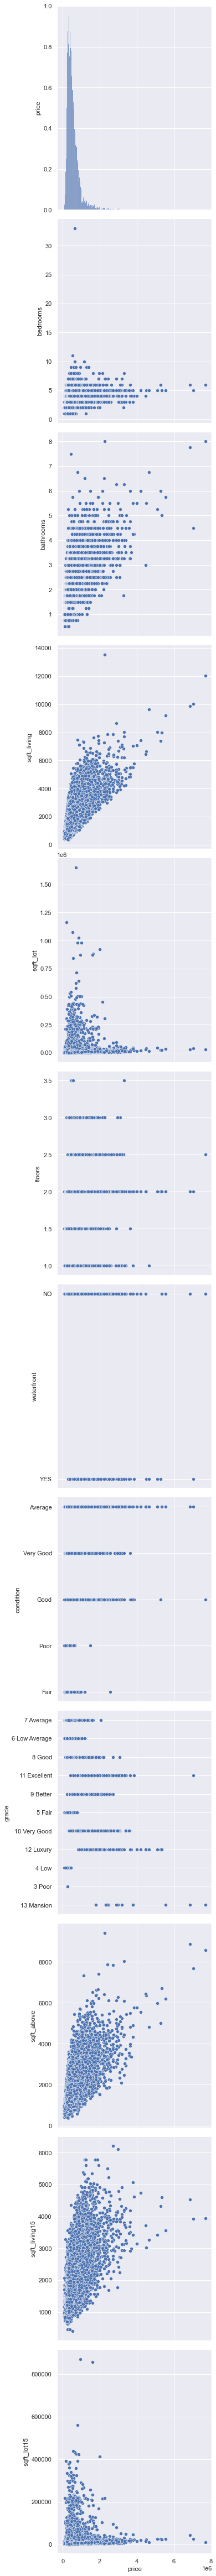

In [19]:
#scatterplot showing if there is a linear relationship between features and price 
sns.set()
cols = df.columns
sns.pairplot(data=df, x_vars=["price"], y_vars=cols, height = 5.5)
plt.show();

In [20]:
#removing outliers in our target variable price

def outlier(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [21]:
outlier(df['price'])

(-162500.0, 1129500.0)

In [22]:
lowerbound,upperbound = outlier(df.price)

In [23]:
df['price'].drop(df[ (df.price > upperbound) | (df.price < lowerbound) ].index , inplace=True)

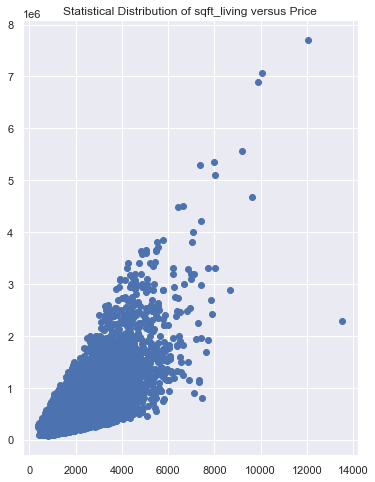

In [24]:
#relationship between price and sqft_living after removing outliers

plt.figure(figsize=(6,8))
plt.scatter( x=df['sqft_living'], y=df['price'] )
plt.title('Statistical Distribution of sqft_living versus Price')
plt.show();

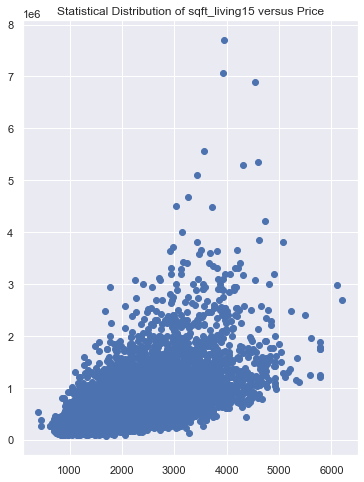

In [25]:
# relationship between price and sqft_living15 after outliers

plt.figure(figsize=(6,8))
plt.scatter( x=df['sqft_living15'], y=df['price'] )
plt.title('Statistical Distribution of sqft_living15 versus Price')
plt.show();

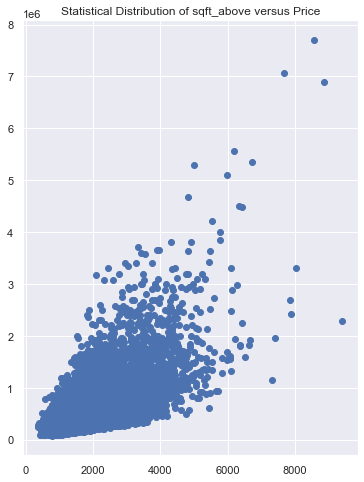

In [26]:
#relationship between price and sqft_living

plt.figure(figsize=(6,8))
plt.scatter( x=df['sqft_above'], y=df['price'] )
plt.title('Statistical Distribution of sqft_above versus Price')
plt.show();

In [27]:
#dealing with null values
#taking waterfront column with data that are not null

df = df[df['waterfront'].notna()]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
id,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,1800,7503
7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,3890,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,1180,1330,1265
263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,1830,7200


In [28]:
#checking if all nulls are dealt with
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
df.corr()['price'].drop('price')

bedrooms         0.309651
bathrooms        0.527350
sqft_living      0.704652
sqft_lot         0.087005
floors           0.258277
sqft_above       0.609168
sqft_living15    0.582167
sqft_lot15       0.081243
Name: price, dtype: float64

we have sqft_living, sqft_above, sqft_living15, bathrooms

In [30]:
#verifying that our data has no null values before modeling
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
df.condition

id
6414100192      Average
5631500400      Average
2487200875    Very Good
1954400510      Average
7237550310      Average
                ...    
2997800021      Average
263000018       Average
6600060120      Average
1523300141      Average
1523300157      Average
Name: condition, Length: 19221, dtype: object

In [32]:
# saving my cleaned data to csv

df.to_csv('King County_cleaned.csv', index=False)

# Data preparation report

* We first drop columns that won't be needed for the analysis.
* Our target variable is price which will be used in creating a model.
* Removed outliers in our independent variables.
* Checking the distributions of price it contained outliers which were removed and performed a log transformation. 
* Null values were removed by dropping rows with the nulls.
* In correlation between price and other features, we have sqft_living, sqft_above, sqft_living15 and bathrooms having high positive correlation. This will be used in creating our model.
* we will perform one-hot encoding for the categorical variables waterfront, grade, condition so as to be used in creating a model.


# 4) Modeling

# i) Linear Regression

Here we use linear regression analysis to predict house price based on various features

In [33]:
X = df[['sqft_living']]
y = df['price']

#creating a linear model

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:49:53   Log-Likelihood:            -2.6723e+05
No. Observations:               19221   AIC:                         5.345e+05
Df Residuals:                   19219   BIC:                         5.345e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.045e+04   4703.746    -10.726      

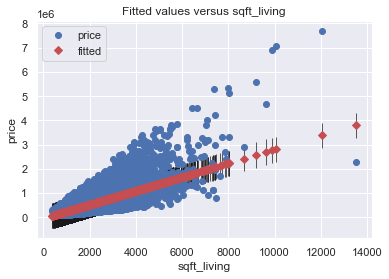

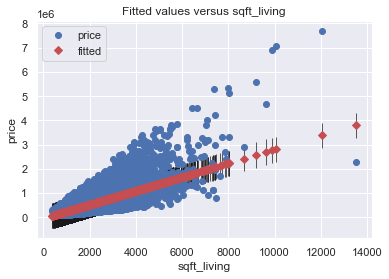

In [34]:
# visualizing our model
sm.graphics.plot_fit(results, "sqft_living")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


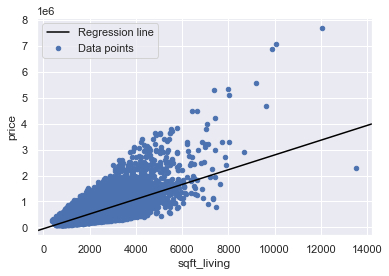

In [36]:
#regression line:

fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax, color="black")
ax.legend();

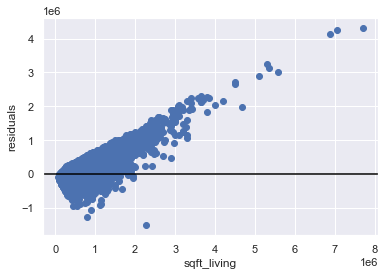

In [38]:
#residuals:

fig, ax = plt.subplots()

ax.scatter(df["price"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

# interpreting our linear regression model:

* from about our model can be defined as:

           price = -5.045e+04 + 284.3280sqft_living

* Here, 49.7% variation in price can be explained by the Square footage of living space in the home

* An rsquared of 49.7% is a low variation and indicates the Square footage of living space in the home is not explaining much variation of the price. 

* we solve this by doing a multiple linear regression, adding more variables to our model to increase variability.

# ii) Multiple linear regression

Independent variables used: sqft_living, sqft_above, bedrooms, condition, grade

a) Starting with numerical values:

In [39]:
X = df[['sqft_living', 'sqft_living15']]
y = df['price']

In [40]:
#creating a model

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     9698.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:15   Log-Likelihood:            -2.6712e+05
No. Observations:               19221   AIC:                         5.342e+05
Df Residuals:                   19218   BIC:                         5.343e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.021e+05   5818.438    -17.541

# iii) multiple linear regression interpretation:

* The model built is:
       price = -1.021e+05 + 249.0055sqft_living + 62.9802sqft_living15
* The model explains 50.2 % variation in price.
* The model coefficients (const, sqft_living, and sqft_living15) are all statistically significant, with t-statistic p-values well below 0.05
* For each increase of squarefoot, we see an associated increase in price of about 249.0055.
* This is a little bit smaller of a increase than we saw with the simple model, but not a big change.
* For each increase of 1 in sqft_living15, we see an associated increase in price of about  62.9802.
* All of the p-values round to 0.

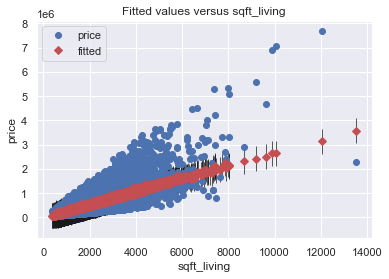

In [41]:
#ploting the fit for the sqft_living predictor

sm.graphics.plot_fit(results, "sqft_living")
plt.show()

This shows true(blue) and predicted(red) values with Square footage of living space in the home as the predictor.

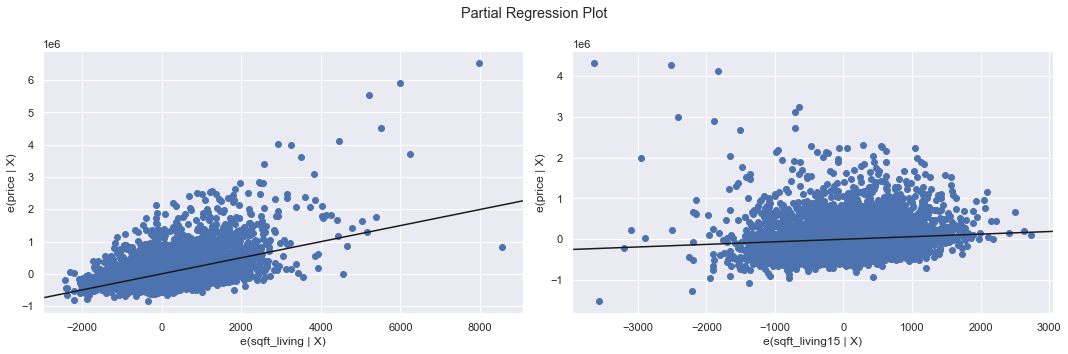

In [42]:
#Partial Regression Plot

fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(results, exog_idx=["sqft_living", "sqft_living15"], fig=fig)
plt.tight_layout()
plt.show()

* The partial regression plot for sqft_living is showing the marginal contribution of sft_living compared to a model with just sqft_living15. Both predictors should be included in the model.

In [56]:
# using our fitted model to generate predictions for y(price)

y_pred = results.predict(sm.add_constant(X)) 
y_pred.head()

id
6414100192    5.252083e+05
5631500400    2.374213e+05
2487200875    4.958584e+05
1954400510    4.483307e+05
7237550310    1.708410e+06
dtype: float64

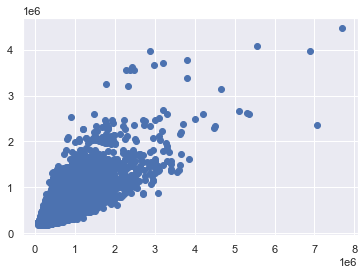

In [48]:
plt.scatter(x=df.price, y=y_pred)

# Multiple Linear Regression including categorical variables

For condition and grade we perform one-hot encoding to convert them to numerical counterparts.

In [44]:
y = df["price"]
X = df[['sqft_living', 'sqft_above', 'grade']]
X = pd.get_dummies(X, columns=['grade'], drop_first=True) 

X

,sqft_living,sqft_above,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,
6414100192,2570,2170,0,0,0,0,0,0,0,1,0,0
5631500400,770,770,0,0,0,0,0,0,1,0,0,0
2487200875,1960,1050,0,0,0,0,0,0,0,1,0,0
1954400510,1680,1680,0,0,0,0,0,0,0,0,1,0
7237550310,5420,3890,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,1310,1180,0,0,0,0,0,0,0,0,1,0
263000018,1530,1530,0,0,0,0,0,0,0,0,1,0
6600060120,2310,2310,0,0,0,0,0,0,0,0,1,0


* we drop the first column when performing one-hot coding to avoid dummy variable trap.

In [49]:
# creating a multiple linear regression model that includes categorical variables

model = sm.OLS(y, sm.add_constant(X))
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2341.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:20:26   Log-Likelihood:            -2.6517e+05
No. Observations:               19221   AIC:                         5.304e+05
Df Residuals:                   19208   BIC:                         5.305e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.954e+05   1

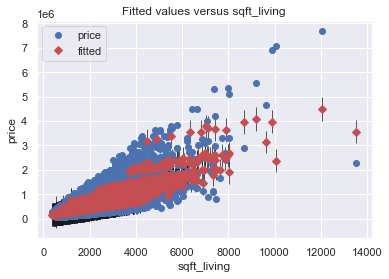

In [52]:
#model_fit

sm.graphics.plot_fit(results1, "sqft_living")
plt.show()

Visualizing true (blue) vs. predicted (red) values, with the predictor, sqft_living along the x-axis.

# interpretation:

* The model explains 59.4% variation in price.
* All of the p-values round to 0

* when all predictors are 0, the price value would be about 5.954e+05
* with each increase in 1 sqft_living, we see an associated price increase of 220.1353 
  and with each inctrease in 1 sqft_above, we see an associated price decrease of -93.6898
* For a house with an overall grade of 11(Excellent) we see an increase of 2.844e+05 in price of the house, an increase of 8.757e+05 in house price for grade 12(luxury) and 2.036e+06 on grade_13 Mansion.
* for the company to maximize on profit, the houses should be of a high overall grade of the house. Related to the construction and design of the house.


In [55]:
# using our fitted model to generate predictions for y(price)

y_pred = results.predict(sm.add_constant(X)) 
y_pred.head()

id
6414100192    5.252083e+05
5631500400    2.374213e+05
2487200875    4.958584e+05
1954400510    4.483307e+05
7237550310    1.708410e+06
dtype: float64